## Data:
I am using a dataset named ‘515K Hotel Reviews Data in Europe’ from Kaggle. This dataset was scraped from booking.com and it contains information pertaining to hotel reviews in Europe. It had many more datapoints than 5,000 so I filtered to see how many reviews were left by reviewers of different nationalities. Then, I made a new dataframe with only reviews left by people from Kazakhstan as that is my home country, so it will be interesting for me to analyze this data as well as it having less than 5,000 datapoints. It has 17 columns, including hotel information and rating, the review text and score along with other information.

I want to analyze how the Kazakh reviewers’ opinions align with the hotel average score, hotels in which regions get the best reviews from Kazakh travelers, and which tags influence the rating the most.

## Goals and Tasks:
Thus, my goals for this project are trifold:

1. **Alignment of Kazakh Reviewers' Opinions with Average Scores:**
    - Compare the scores given by Kazakh reviewers to the average scores of the hotels.
    
2. **Geographical Distribution of Reviews:**
    - Identify which regions have the best reviews from Kazakh travelers.
    
3. **Impact of Tags on Final Score:**
    - Analyze how different tags influence the final scores given by Kazakh reviewers.

To reach these goals, I will need to perform the following tasks:

1. **Data Cleaning and Preprocessing:**
- Filter reviews specifically from Kazakh reviewers.
- Handle missing values and convert data types if necessary, drop irrelevant columns.

2. **Visualization:**
- Create visualizations to compare Kazakh reviewers' scores with hotel average scores.
- Map the geographic distribution of hotels and their reviews.
- Use bar charts or other tools to analyze the impact of tags on review scores.

3. **Evaluation:
- Conduct evaluations with at least three individuals to gather feedback on the visualizations.
- Use the feedback to refine and improve the visualizations.


In [1]:
import pandas as pd
import altair as alt
import folium 
import numpy as np
import matplotlib.pyplot as plt

# Evaluating Kazakh Reviewers' Scores Against the Global Average


## Summary and Justifications:

### Visualization #1: Scatter plot

This is a scatter plot using Altair to compare the average score of hotels with the reviewer score given by Kazakh reviewers. Each point in the plot represents a hotel, with its x-coordinate indicating the average score and its y-coordinate indicating the reviewer score given by Kazakh reviewers. When you hover over a point, it highlights the hotel name along with the corresponding average score and Kazakh reviewer score.

This visualization is effective for several reasons:

1. **Comparison of Two Variables:** It allows viewers to easily compare the average score with the reviewer score for each hotel, facilitating analysis of any discrepancies or patterns.

2. **Tooltip:** The plot includes a tooltip, enabling users to hover over points and see specific hotel details, enhancing the data understanding and putting it in context.

3. **Interactive Highlighting:** The plot is interactive, highlighting the point which is being hovered over and making the rest less opaque without changing the hue. For hotels, which have multiple reviews, all of those points are highlighted when one is selected, which enhances the exploration experience.

4. **Clear Title and Axes Labels:** The plot is well-labeled with a descriptive title and axis labels, ensuring clarity about what the plot represents.

By saving the plot as an HTML file, it becomes easy to share and view across different platforms, making it a versatile tool for analysis and communication.


In [ ]:
# scatter plot to compare kazakh reviews and average score for each hotel

df = pd.read_csv('kazakh_reviews.csv')

# Define a selection that highlights points with the same hotel name
highlight = alt.selection_point(fields=['Hotel_Name'], nearest=True, on='mouseover', empty= True)

# Create scatter plot using Altair
base = alt.Chart(df).mark_point().encode(
    x='Average_Score',
    y='Reviewer_Score',
    tooltip=['Hotel_Name', 'Average_Score', 'Reviewer_Score']
)

# Points that are not highlighted
points = base.encode(
    opacity=alt.condition(highlight, alt.value(1), alt.value(0.2))
).add_params(
    highlight
)

# Highlighted points
highlighted = base.encode(
    opacity=alt.value(1)
).transform_filter(
    highlight
)

# Trend line
trend = base.transform_regression(
    'Average_Score', 'Reviewer_Score'
).mark_line(color='orange').encode(
    opacity=alt.value(0.5)
)

# Layer the charts
chart = points + highlighted
# Properties of the chart
chart = chart.properties(
    title='Average Score vs Kazakh Reviewer Score',
    width=900,
    height=500
)

chart

alt.LayerChart(...)

### Visualization #2: Hotel Map

The second visualization is a map chart using Folium to visualize the locations of hotels in Europe along with color-coded markers based on the reviewer score quartiles. The map displays the hotels located within the geographical boundaries of Europe, with markers positioned at their respective latitude and longitude coordinates. The color of each marker corresponds to the quartile category of the reviewer score, indicating whether the hotel falls in the bottom 25%, middle 50%, or top 25% of scores.

This map works well for several reasons:

1. **Geographical Context:** By plotting the hotels on a map, viewers can easily understand their geographical distribution across Europe, providing context for the analysis.

2. **Color-Coded Markers:** The color-coded markers based on reviewer score quartiles enable viewers to quickly discern the quality range of hotels. This visual categorization aids in identifying clusters of hotels with similar review scores.

3. **Interactivity:** Each marker includes a tooltip displaying relevant information such as the hotel name, average score, and reviewer score. This interactive feature enhances the viewer's ability to explore individual data points and gather detailed information.

4. **Clarity and Readability:** The map is clear and readable, with distinct markers and informative tooltips, ensuring that viewers can easily interpret the data without confusion.


In [3]:
df = pd.read_csv('kazakh_reviews.csv')


# Filter hotels in Europe (Assuming you have latitude and longitude boundaries for Europe)
europe_boundaries = {
    'lat': (30, 70),  # Latitude boundaries for Europe
    'lng': (-20, 40)  # Longitude boundaries for Europe
}
european_hotels = df[
    (df['lat'] >= europe_boundaries['lat'][0]) & (df['lat'] <= europe_boundaries['lat'][1]) &
    (df['lng'] >= europe_boundaries['lng'][0]) & (df['lng'] <= europe_boundaries['lng'][1])
]

# Calculate quartiles for color categories
lowest_score = european_hotels['Reviewer_Score'].min()
highest_score = european_hotels['Reviewer_Score'].max()
first_quartile = np.percentile(european_hotels['Reviewer_Score'], 25)
third_quartile = np.percentile(european_hotels['Reviewer_Score'], 75)


# Create a Folium map centered on Europe
europe_map = folium.Map(location=[53.0, 10.0], zoom_start=5)

for index, row in european_hotels.iterrows():
    score = row['Reviewer_Score']
    if score <= first_quartile:
        color = 'red'  # Bottom 25%
    elif score <= third_quartile:
        color = 'orange'  # Middle 50%
    else:
        color = 'green'  # Top 25%
    
    hotel_info = f"<div style='width: 230px; height: 50px;'>Hotel Name: {row['Hotel_Name']}<br>Average Score: {row['Average_Score']}<br>Reviewer Score: {score}</div>"
    folium.Marker(
        location=[row['lat'], row['lng']],
        tooltip=hotel_info,
        icon=folium.Icon(color=color)
    ).add_to(europe_map)

# Display the map
europe_map.save('europe_hotels_map.html')

#display plot
plt.show()

europe_map


### Bonus Visualization: Bar Chart

This section contains a chart that was not planned and is not one of the tasks, but I thought it would be interesting to attempt to show the difference on average between the average score and the Kazakh reviewer score by country. 

The bar chart displays the mean average score and reviewer score for each country, with bars representing the two scores side by side. The x-axis denotes the countries, while the y-axis represents the mean score. The chart allows viewers to compare the average score and reviewer score for each country visually.

#### Justification:

1. **Comparison of Scores:** The side-by-side bars allow for a direct comparison between the mean average score and reviewer score for each country. Viewers can easily identify countries where reviewers tend to rate hotels higher or lower than the average score.

2. **Clear Labeling:** The chart is well-labeled with informative axis labels and a descriptive title, making it easy for viewers to understand the content and context of the visualization.

3. **Country-Specific Analysis:** By grouping scores by country, the chart enables viewers to analyze regional variations in review scores. This can provide valuable insights into cultural differences or specific factors influencing review scores in different countries.

4. **Sorting:** The countries are sorted so that the difference between the mean average score and the mean Kazakh reviewer score increases. Thus, on the left are the countries in which those statistics are the most similar, and on the right those where they are most different. This ensures that the viewer is able to trace the growing gap.

5. **Readable Design:** The chart is visually appealing and easy to read, with distinct bars for each score category and clear separation between countries. This ensures that viewers can interpret the data accurately without ambiguity.


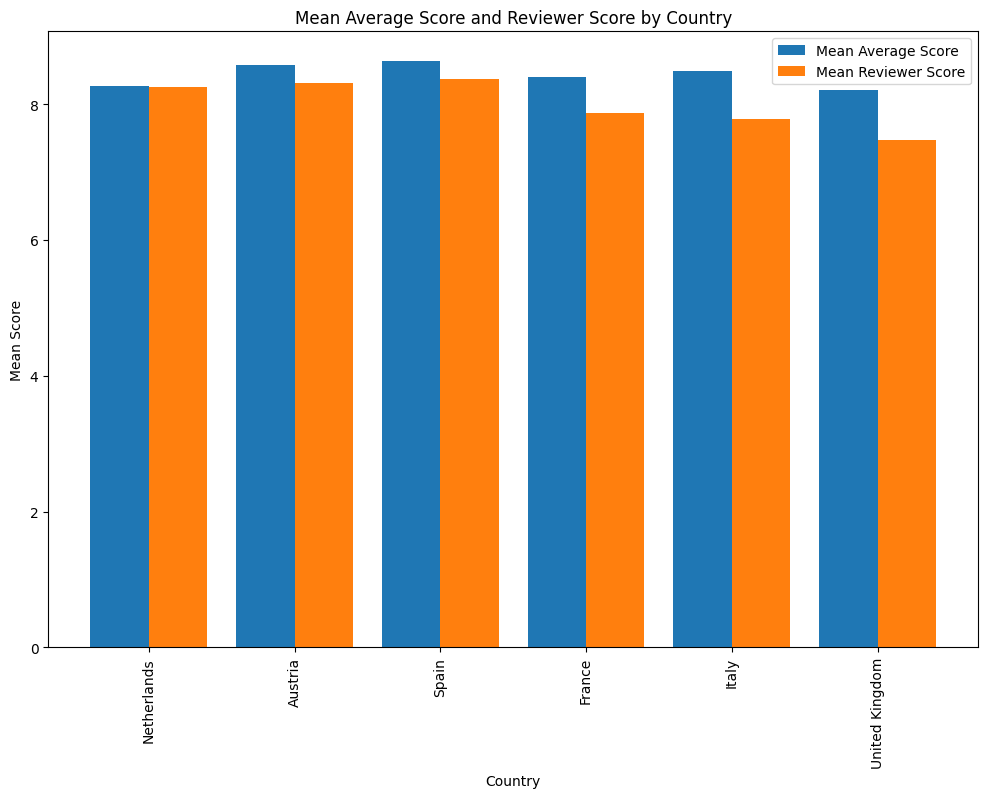

In [4]:
df = pd.read_csv('kazakh_reviews.csv')

# Split the 'Hotel_Address' column by space and get the last word
df['Country'] = df['Hotel_Address'].apply(lambda x: x.split()[-1])

df['Country'] = df['Country'].replace('Kingdom', "United Kingdom")

#Create a variable to track how much higher the reviwever score is than the average ( if negative taht means that the kazakh person gave it a lower rating than the average)
df["Delta"] = df["Average_Score"] - df["Reviewer_Score"]
#print(df['Delta'].tail())

country_scores = df.groupby('Country')['Delta'].mean()
#print(country_scores)


# Group by Country and calculate the mean for Reviewer_Score and Average_Score
country_scores = df.groupby('Country')[['Reviewer_Score', 'Average_Score']].mean().reset_index()

# Calculate the difference between mean Average_Score and mean Reviewer_Score
country_scores['Difference'] = country_scores['Average_Score'] - country_scores['Reviewer_Score']

# Sort countries by the difference
country_scores = country_scores.sort_values(by='Difference', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))

# Set the position of each bar on the x-axis
x = range(len(country_scores))

# Plot bars for Average_Score
plt.bar(x, country_scores['Average_Score'], width=0.4, label='Mean Average Score')

# Plot bars for Reviewer_Score
plt.bar([i + 0.4 for i in x], country_scores['Reviewer_Score'], width=0.4, label='Mean Reviewer Score')

# Add labels and title
plt.xlabel('Country', )
plt.ylabel('Mean Score')
plt.title('Mean Average Score and Reviewer Score by Country')
plt.xticks([i + 0.2 for i in x], country_scores['Country'], rotation=90)
plt.legend()

#display plot
plt.show()

### Visualization #3: Horizontal Bar Chart

The horizontal bar chart made with Seaborn displays the average reviewer score for each tag extracted from hotel reviews. Each bar represents a specific tag, and its length indicates the average reviewer score associated with that tag. The tags are sorted by average reviewer score, with the highest-scoring tags appearing at the top.

#### Justification:

1. **Impact of Tag:** The bar chart effectively communicates the impact of different tags on reviewer scores. Viewers can quickly identify which tags are associated with higher or lower average scores, providing insights into factors influencing review ratings.

2. **Horizontal Orientation:** The horizontal orientation of the bars makes it easier to compare the lengths of the bars and identify the highest and lowest scoring tags at a glance.

3. **Color Palette:** The use of the Viridis color palette enhances the visual appeal of the chart and aids in distinguishing between different tags. The colors are chosen to be perceptually uniform and accessible to viewers with color vision deficiencies.

4. **Clear Title and Labels:** The chart is appropriately titled, and the axes are labeled clearly, providing context for the data being presented. Font sizes for both x and y-axis ticks are adjusted to ensure readability.


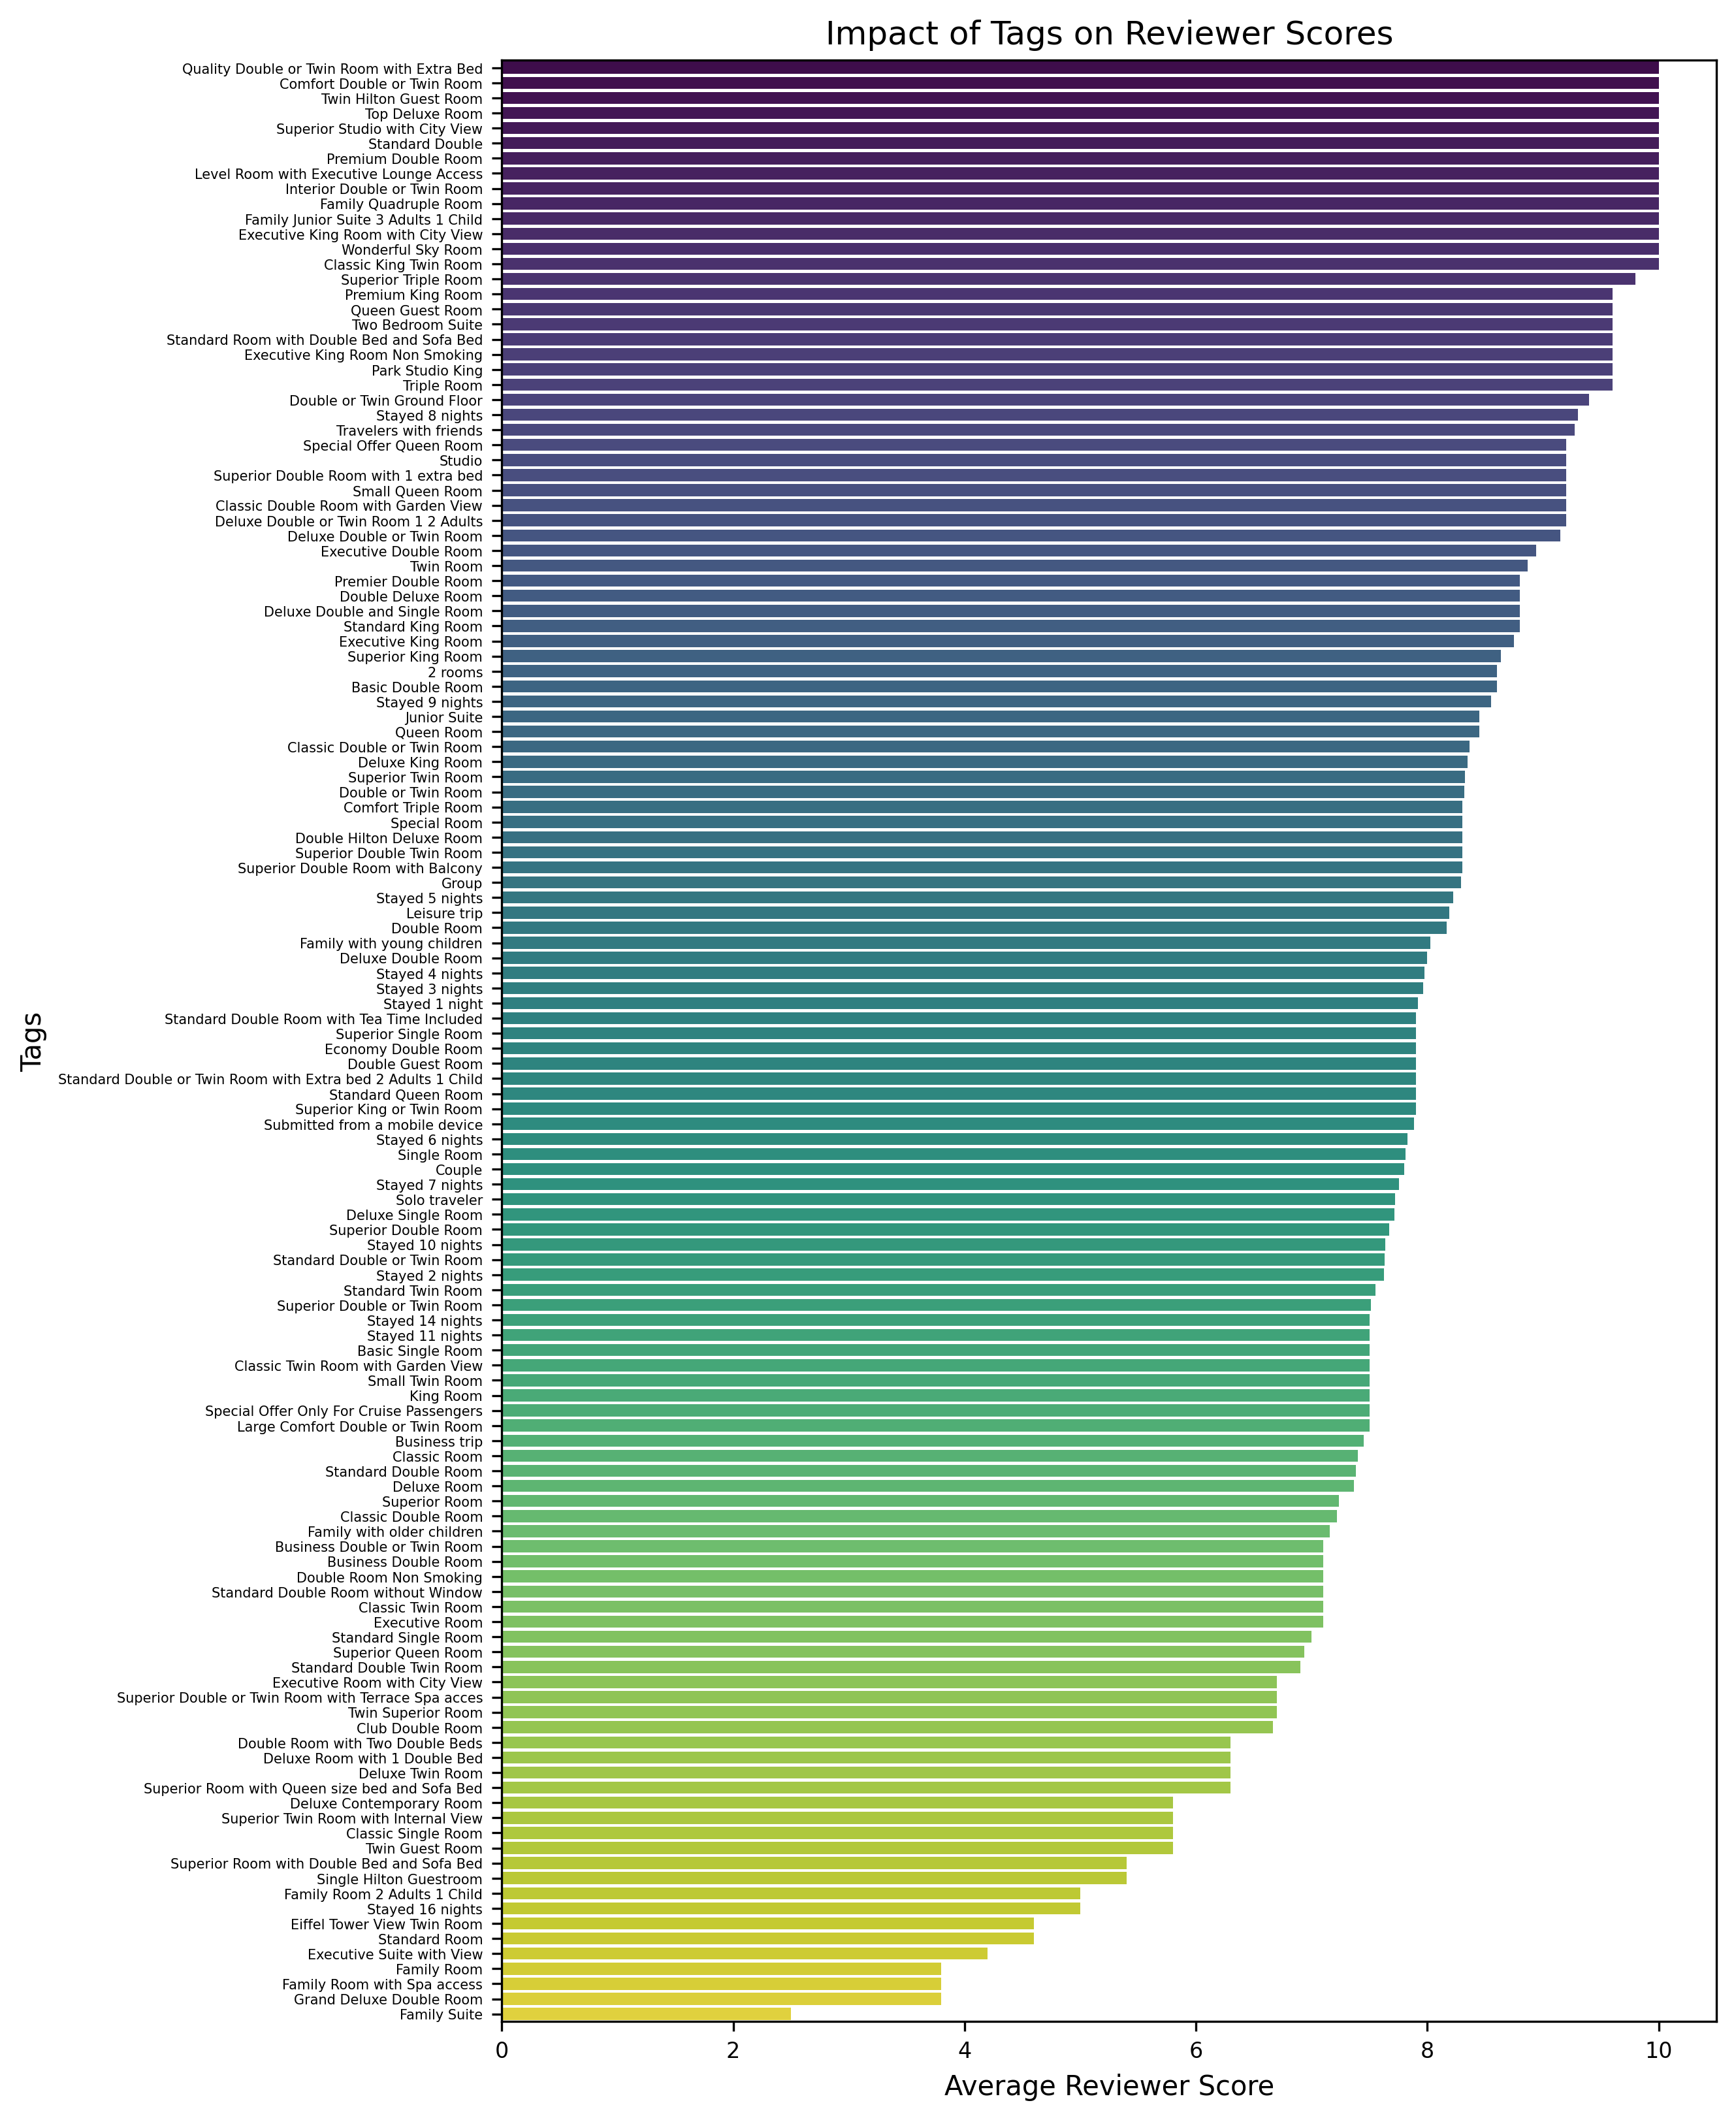

In [5]:

df = pd.read_csv('kazakh_reviews.csv')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter reviews by Kazakh reviewers
kazakh_reviews = df

# Split the tags into individual tags
kazakh_reviews['Tags'] = kazakh_reviews['Tags'].str.strip('[]').str.replace("'", "").str.split(',')

# Debug: Check the split tags
#print(kazakh_reviews['Tags'].head())

# Explode the tags into separate rows
kazakh_reviews = kazakh_reviews.explode('Tags')

# Debug: Check the exploded DataFrame
#print(kazakh_reviews[['Tags']].head())

# Strip any leading or trailing whitespace from the tags
kazakh_reviews['Tags'] = kazakh_reviews['Tags'].str.strip()

# Debug: Check the stripped tags
#print(kazakh_reviews[['Tags']].head())

# Calculate the average Reviewer_Score for each tag
tag_scores = kazakh_reviews.groupby('Tags')['Reviewer_Score'].mean().reset_index()

# Debug: Check the tag scores DataFrame
#print(tag_scores.head())

# Sort by average Reviewer_Score
tag_scores = tag_scores.sort_values(by='Reviewer_Score', ascending=False)

# Debug: Check the sorted tag scores
#print(tag_scores.head())

# Plot the average Reviewer_Score for each tag
plt.figure(figsize=(8, 13), dpi = 300)
sns.barplot(data=tag_scores, x='Reviewer_Score', y='Tags', hue = 'Tags', legend= False, palette = 'viridis')
sns.color_palette("Blues", as_cmap=True)
plt.title('Impact of Tags on Reviewer Scores')
plt.xlabel('Average Reviewer Score')
plt.ylabel('Tags')
plt.xticks(fontsize=8)
plt.yticks(fontsize=5)
plt.show()



### Evaluation

For the final evaluation of the visualizations, I employed a structured approach involving my friends as evaluators. Here's a breakdown of the evaluation procedure, the individuals recruited, and the results:

#### Procedure:

1. **Preparation of Visualizations:** I prepared the visualizations based on the requirements of the assignment and any initial feedback received.
2. **Selection of Evaluators:** Due to the difficulty in recruiting experts or individuals from the target population, I recruited my friends to evaluate the designs.
3. **Presentation of Visualizations:** I presented the visualizations to my friends individually, providing context about the data and the purpose of each visualization.
4. **Feedback Collection:** After viewing each visualization, I solicited feedback from my friends regarding their clarity, effectiveness in conveying information, and overall visual appeal.
5. **Documentation of Feedback:** I documented the feedback provided by each friend, noting any suggestions for improvements or areas of confusion.
6. **Implementation of Feedback:** Based on the feedback received, I made revisions to the visualizations to address any identified issues or areas for improvement.
7. **Second Presentation of Visualizations:** I presented the revised visualizations to my friends.
8. **Second Feedback Collection:** After viewing each visualization, I solicited feedback from my friends regarding their clarity, effectiveness in conveying information, and overall visual appeal.
9. **Second Documentation of Feedback:** I documented the feedback provided by each friend, noting any suggestions for improvements or areas of confusion.

#### People Recruited:

I recruited my friends, who have varying backgrounds and levels of familiarity with data visualization, to evaluate the designs. While they may not be experts in the field, their perspectives provided valuable insights from a diverse set of viewpoints.

#### Results:

In the first round of evaluations, one of my friends brought up accessibility concerns, specifically making sure that the last bar chart be perceptually uniform and accessible to viewers with color vision deficiencies. That is how I landed on using the Viridis palette since the gradient is apparent even without color.

The second evaluation yielded valuable feedback, particularly regarding the clarity and effectiveness of the visualizations. My friends provided constructive criticism and suggestions for improvement, such as highlighting the difference between scores in the bar chart and grouping similar tags together in the horizontal bar chart.

Overall, the evaluation approach involving my friends proved to be beneficial in identifying areas for enhancement and ensuring that the final visualizations meet the requirements and expectations of the assignment.



### Findings:

Synthesizing the findings from both the visualization creation process and the evaluation, several elements emerged as successful while others revealed opportunities for refinement in future iterations.

#### Elements that Worked Well:

1. **Visualization Design Choices:** The selection of visualization types, such as scatter plots, bar charts, and maps, was appropriate for the data being presented. Each visualization effectively conveyed the intended information and allowed for clear interpretation.
2. **Interactivity and Engagement:** Incorporating interactivity, such as tooltips and color-coded markers, enhanced user engagement and facilitated exploration of the data. Interactive elements provided additional context and details without overwhelming the viewers.
3. **Clear Communication:** The visualizations were accompanied by clear titles, axis labels, and legends, ensuring that viewers could understand the content and context of the data being presented. This facilitated effective communication of insights to the audience.

#### Elements to Refine in Future Iterations:

1. **Diversity in Feedback Sources:** While feedback from friends was valuable, incorporating perspectives from a more diverse group of individuals, including those with varying levels of expertise and backgrounds, could provide a broader range of insights and ensure that the visualizations cater to a wider audience.
2. **Usability and Accessibility:** Prioritizing usability testing and accessibility considerations from the outset of the design process can help identify and address potential usability issues and ensure that the visualizations are accessible to all users, including those with disabilities.
3. **Incorporation of Advanced Techniques:** Exploring advanced techniques such as machine learning for data analysis or dynamic visualizations powered by real-time data can add depth and sophistication to the visualizations, providing deeper insights and enhancing user engagement.

In future iterations, focusing on these areas for refinement while building on the strengths of the current approach can lead to even more impactful and effective visualizations that effectively communicate insights to the intended audience.